In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd

# Gaussian and Student-t Marginals/Copulas

Consider four combinations:
* Gaussian marginals with Gaussian copula
* Gaussian marginals with Student-t copula
* Student-t marginals with Gaussian copula
* Student-t marginals with Student-t copula

Bivariate distributions with linear correlation $\rho = 0.5$ are used. 
For Student-t, the degree of freedom, denoted by $\nu$, is set to 3. 

In [2]:
rho = 0.5
n = 2500
cov = np.array([[1.0,rho],[rho,1.0]])
gg = np.random.multivariate_normal([0,0], cov, n).T
df = 3
tt = gg / np.sqrt(np.random.chisquare(df, n)/df)
tg = ss.t.ppf(ss.norm.cdf(gg), df)
gt = ss.norm.ppf(ss.t.cdf(tt, df))

## Prepare plots

In [3]:
def plot(xy, title):
    df = pd.DataFrame(data=xy.T, columns=['x','y'])
    g = sns.JointGrid(data=df, x='x', y='y', space = 0,  xlim=vlim, ylim=vlim)
    g.plot_joint(sns.scatterplot, s=5)
    g.plot_joint(sns.kdeplot, fill=False, thresh=0, levels=10, cmap='viridis')
    g.plot_marginals(sns.histplot, color='#AAAAAA', alpha=1, bins=bins)
    return g
    

vlim = (-5, 5)
bins = np.arange(-100, 100, 0.5)
a_p = [
    ['Gaussian marginal / Gaussian copula',gg],
    ['Gaussian marginal / Student-t copula',gt], 
    ['Student-t marginal / Gaussian copula',tg], 
    ['Student-t marginal / Student-t copula',tt]
]

for i, p in enumerate(a_p):
    print('working on ' + p[0])
    g = plot(p[1], p[0])
    g.savefig('ex_' + str(i) + '.png')
    plt.clf()

working on Gaussian marginal / Gaussian copula
working on Gaussian marginal / Student-t copula
working on Student-t marginal / Gaussian copula
working on Student-t marginal / Student-t copula


<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

## Scatter plots

<table>
    <th></th><th>Gaussian Copula</th><th>Student-t Copula</th></tr>
<tbody>
    <tr><th>Gaussian Marginals</th><td><img src="ex_0.png"></td><td><img src="ex_1.png"></td></tr>
    <tr><th>Student-t Marginals</th><td><img src="ex_2.png"></td><td><img src="ex_3.png"></td></tr>
</tbody>
</table>

## Pure matplotlib plot

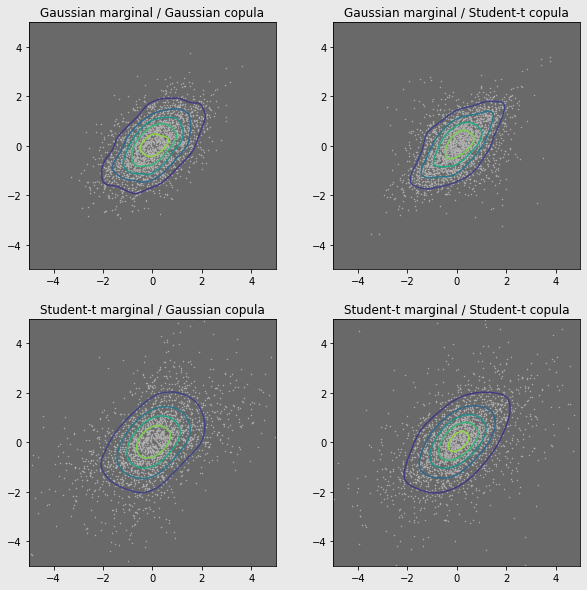

In [4]:
vlim = [-5, 5]
klim = [-10, 10]
def plot(xy, title):

    ax.patch.set_facecolor(0.2*np.array([1,1,1]))
    ax.patch.set_alpha(0.7)
    plt.plot(xy[0], xy[1], '.', ms=1, c = 0.7*np.array([1,1,1]), zorder = -10)

    x = np.linspace(klim[0], klim[1], 201)
    X,Y = np.meshgrid(x, x)
    p = np.vstack([X.ravel(), Y.ravel()])     
    v = np.vstack([xy[0], xy[1]])
    k = ss.gaussian_kde(v)
    Z = np.reshape(k(p).T, X.shape)

    plt.contour(X,Y,Z,levels=5)

    plt.xlim(vlim)
    plt.ylim(vlim)
    ax.set_title(title)
    ax.set_aspect('equal')

fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
for i, p in enumerate(a_p):
    ax = fig.add_subplot(221 + i)
    plot(p[1], p[0])
plt.show()

# Correlation measurement
Here, the following correlation measures are considered:
* $\rho_p$: Pearson correlation, also known as linear correlation
* $\rho_s$: Spearman correlation, a well-known rank correlation measure
* $\rho_k$: Kendall correlation, another well-known rank correlation measure

## conversions

For bivariate normal $(x,y)$, we have
* $\rho_p = 2 \sin(\pi \rho_s / 6)$
* $\rho_p = \sin(\pi\rho_k / 2)$
See, for example, http://www.columbia.edu/~mh2078/QRM/Copulas.pdf

The second equation for Kendall correlation holds for elliptic distributions including Student-t. See https://people.kth.se/~lindskog/papers/KendallsTau.pdf. 

## Student-t

Note that a multivariate Student-t distribution $Y$ with $\nu$ degree of freedom can be generated through
$$
Y = \frac{X}{\sqrt{Q/\nu}}
$$
where $X$ is a multivariate normal with variance matrix $\Sigma$ and $Q$ is a $\chi^2$ distribution with $\nu$ degree of freedom. The variace matrix for $Y$ is given by
$$
\frac{\nu}{\nu-2} \Sigma \quad \textrm{if} \quad \nu > 2
$$
Otherwise, undefined. See https://en.wikipedia.org/wiki/Multivariate_t-distribution. Consequently, the correlation matrix for $Y$ is equal to that of $X$. 

## Experiment 1
Consider a bivariate Student-t distribution with the covariance matrix
$$
\left[
\begin{array}{cc}
1 & \rho \\
\rho & 1
\end{array}
\right]
$$
Simulate the samples and calculate the correlations - Pearson, Spearman and Kendall. Observe the bias and variance of each measure. 

In [5]:
num_samples = 1000
M = 120
df = 3
rho = 0.5
v_ps = np.zeros(num_samples)
v_sp = np.zeros(num_samples)
v_kd = np.zeros(num_samples)

for s in range(num_samples):

    mtx_C = np.array([[1.0, rho],[rho, 1.0]])
    X = np.random.multivariate_normal(np.zeros(mtx_C.shape[0]), mtx_C, M).T
    Q = np.random.chisquare(df, M)
    T = X / np.sqrt(Q/df)
    
    v_ps[s] = ss.pearsonr(T[0], T[1])[0]
    v_sp[s] = ss.spearmanr(T[0], T[1])[0]
    v_kd[s] = ss.kendalltau(T[0], T[1])[0]

v_kd2ps = np.sin(v_kd * np.pi/2.0)

kw_c = {'Pearson':v_ps, 'Spearman':v_sp, 'Kendall':v_kd, 'Pearson from Kendall': v_kd2ps}


In [6]:
v_qs = np.array([0.25, 0.5, 0.75])
print('quantiles at ' + ','.join(['{0:.2f}'.format(x) for x in v_qs]))
print('------')
for k, v_c in kw_c.items():
    v_cqs = np.quantile(v_c, v_qs)
    print(k + ' : ' + ','.join(['{0:.2f}'.format(x) for x in v_cqs]))

quantiles at 0.25,0.50,0.75
------
Pearson : 0.41,0.50,0.60
Spearman : 0.40,0.46,0.52
Kendall : 0.29,0.33,0.38
Pearson from Kendall : 0.44,0.50,0.56


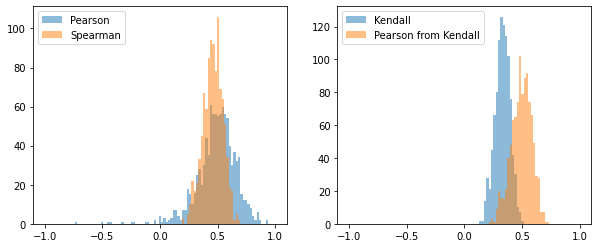

In [7]:
# histogram
bs = np.linspace(-1,1,100)
plt.figure(figsize=(10, 4))
for i, (k, v_c) in enumerate(kw_c.items()):
    if i%2 == 0:
        plt.subplot(121 + int(i/2))

    plt.hist(v_c, bins= bs, alpha = 0.5, label=k)
    plt.legend()
plt.show()

## Experiment 2: 

Simulate a bivariate Student-t distribution, varying $\rho$. Compare the different correlation measures. 

In [8]:
M = 120
df = 3
v_rho = np.linspace(0.0,1.0,21)
v_sp = np.zeros_like(v_rho)
v_ps = np.zeros_like(v_rho)
v_kd = np.zeros_like(v_rho)
for i, rho in enumerate(v_rho):
    
    mtx_C = np.array([[1.0, rho],[rho, 1.0]])
    X = np.random.multivariate_normal(np.zeros(mtx_C.shape[0]), mtx_C, M).T
    Q = np.random.chisquare(df, M)
    T = X / np.sqrt(Q/df)
    
    v_ps[i] = ss.pearsonr(T[0], T[1])[0]
    v_sp[i] = ss.spearmanr(T[0], T[1])[0]
    v_kd[i] = ss.kendalltau(T[0], T[1])[0]

v_kd2ps = np.sin(v_kd * np.pi/2.0)
kw_c = {'Pearson':v_ps, 'Spearman':v_sp, 'Kendall':v_kd, 'Pearson from Kendall': v_kd2ps}

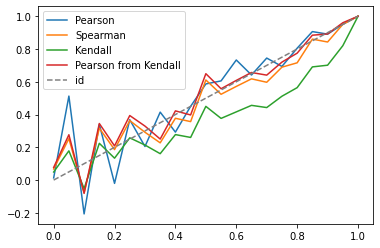

In [10]:
plt.figure()
for k, v_c in kw_c.items():
    plt.plot(v_rho, v_c, label = k)
plt.plot(v_rho, v_rho, '--', c = [0.5, 0.5, 0.5], label='id')
plt.legend()
plt.show()

## Observations

For measuring correlations, the Kendall estimator tends to have smaller variance and becomes unbiased when the conversion to the Pearson formula is applied. 